In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import make_classification

In [15]:
X,y=make_classification(n_samples=100,n_features=4,n_classes=2,n_clusters_per_class=2,n_redundant=2)

In [16]:
X

array([[ 2.00189979e-01,  1.09205391e+00,  1.90375295e+00,
         8.04402167e-01],
       [ 2.53988741e-01, -3.27434210e-01,  7.11146831e-01,
         8.62232825e-01],
       [ 4.02683779e-01, -1.65186327e+00,  5.28397540e-04,
         1.26231001e+00],
       [-1.52825020e-01,  1.24412009e+00,  6.13858907e-01,
        -4.22013288e-01],
       [ 9.07422761e-02,  1.11357728e+00,  1.47834618e+00,
         4.21799508e-01],
       [ 6.27642730e-01, -2.37530182e+00,  1.99178949e-01,
         1.98592813e+00],
       [-9.03304719e-01,  1.74142521e+00, -1.95520874e+00,
        -3.01318109e+00],
       [-1.39514332e-01,  1.06080512e+00,  4.85820914e-01,
        -3.92185663e-01],
       [-1.32629655e-01,  1.41637889e-01, -4.00545935e-01,
        -4.52959403e-01],
       [-8.77601954e-02,  9.49538173e-01,  5.86408404e-01,
        -2.20610236e-01],
       [-7.28536012e-02, -8.49337439e-01, -1.14242515e+00,
        -3.34514023e-01],
       [ 1.05046710e-01,  1.03434215e+00,  1.45791351e+00,
      

In [17]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

<AxesSubplot: xlabel='0', ylabel='1'>

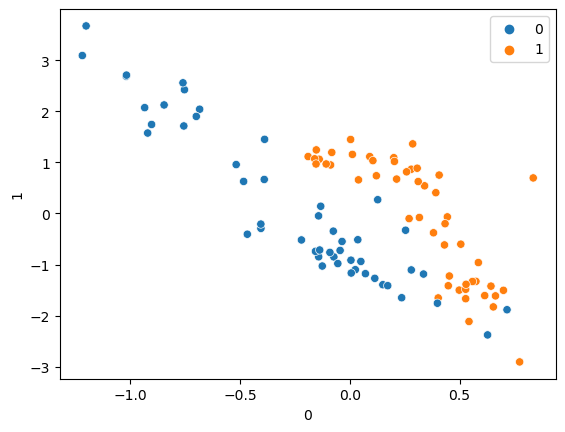

In [20]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [25]:
from sklearn.svm import SVC

In [27]:
svc=SVC(kernel="linear")

In [28]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
svc.coef_

array([[0.19282751, 0.3174703 , 1.10306746, 0.70692991]])

In [32]:
y_pred=svc.predict(x_test)

In [33]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1])

In [38]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [39]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.89      1.00      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

[[22  3]
 [ 0 25]]


In [41]:
print(accuracy_score(y_test,y_pred))

0.94


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid={
    "C":[0.1,1,10,100],
    "gamma":[1,0.1,0.001,0.0001]
}

In [44]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [45]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.800 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.800 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.600 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.800 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [51]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [52]:
y_pred=grid.predict(x_test)

In [53]:
print(confusion_matrix(y_test,y_pred))

[[22  3]
 [ 0 25]]
